# Optical Recognition of Handwritten Digits Data Set

## About Data
1. Data Set Characteristics: Multivariate
2. Number of Instances:
	a) optdigits_69_N200.tra for Training	b) optdigits_69.tes for Testing		
3. Attribute Characteristics: Integer
4. Number of Attributes: 64 inputs+1 class attribute
5. Associated Tasks: Classification
6. Missing Values? No
7. For Each Attribute:
	a) All input attributes are integers in the range 0..16.
	b) The last attribute is the class code 0..9. We are using 6 and 9 only.
8. Class Distribution
	a) Class:	No of examples in training set
	6:  100
	9:  100
	b) Class: No of examples in testing set
	6:  181
	9:  180

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from math import sqrt
from math import pi
from math import log

In [2]:
# Load data from required files
def load_data(filename):
    with open(filename, "r") as file:
        data_string = file.read()
    data = io.StringIO(data_string)
    colnames = [i for i in range(1,66)]
    df = pd.read_csv(data, index_col=False, names=colnames, sep=",")
    return df

In [3]:
train_df = load_data("optdigits_69_N200.tra")
test_df = load_data("optdigits_69.tes")

In [4]:
train_df.describe()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
count,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,...,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.0,0.050000,2.970000,10.690000,9.805000,3.445000,1.225000,0.065000,0.0,1.070000,...,0.475000,0.0,0.045000,3.155000,10.680000,13.520000,10.500000,4.035000,0.170000,7.500000
std,0.0,0.240393,3.566891,4.230055,4.627531,5.050198,3.454569,0.471046,0.0,2.162982,...,1.403289,0.0,0.207824,3.567155,4.379899,3.342974,5.541982,4.564862,0.845384,1.503764
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000
25%,0.0,0.000000,0.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,8.000000,12.750000,7.000000,0.000000,0.000000,6.000000
50%,0.0,0.000000,1.000000,12.000000,11.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,2.000000,11.500000,15.000000,12.500000,2.000000,0.000000,7.500000
75%,0.0,0.000000,5.000000,14.000000,13.000000,5.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,0.0,0.000000,6.000000,14.000000,16.000000,15.000000,7.000000,0.000000,9.000000
max,0.0,2.000000,15.000000,16.000000,16.000000,16.000000,16.000000,4.000000,0.0,11.000000,...,12.000000,0.0,1.000000,13.000000,16.000000,16.000000,16.000000,16.000000,7.000000,9.000000


In [5]:
test_df.describe()

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
count,361.0,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.0,361.000000,...,361.00000,361.0,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.0,0.072022,3.404432,11.498615,10.418283,3.689751,0.789474,0.060942,0.0,1.229917,...,0.31856,0.0,0.044321,3.576177,11.362881,14.121884,10.975069,3.290859,0.074792,7.495845
std,0.0,0.333864,3.831504,3.752869,4.599468,4.729121,2.782884,0.807361,0.0,2.329710,...,1.10851,0.0,0.231486,3.746167,3.804041,3.144942,4.783878,3.950548,0.431344,1.502076
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.0,0.000000,0.000000,10.000000,7.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00000,0.0,0.000000,0.000000,10.000000,14.000000,8.000000,0.000000,0.000000,6.000000
50%,0.0,0.000000,2.000000,13.000000,12.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.00000,0.0,0.000000,2.000000,12.000000,15.000000,12.000000,1.000000,0.000000,6.000000
75%,0.0,0.000000,6.000000,14.000000,14.000000,6.000000,0.000000,0.000000,0.0,1.000000,...,0.00000,0.0,0.000000,6.000000,14.000000,16.000000,15.000000,6.000000,0.000000,9.000000
max,0.0,4.000000,15.000000,16.000000,16.000000,16.000000,16.000000,15.000000,0.0,12.000000,...,8.00000,0.0,2.000000,15.000000,16.000000,16.000000,16.000000,16.000000,6.000000,9.000000


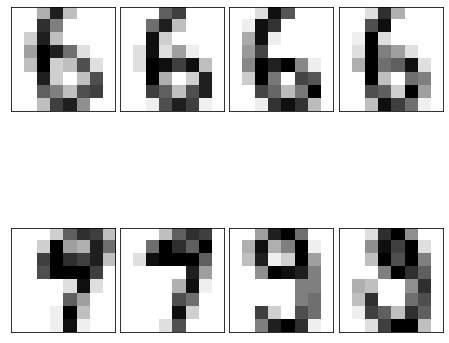

In [6]:
# plot the digits (few instances from both the classes): each image is 8x8 pixels
x_train = np.array(train_df.loc[:,1:64])
x_train = x_train.reshape(200, 8, 8)
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i, j in zip([0,1,2,3,196,197,198,199],range(8)):
    ax = fig.add_subplot(2, 4, j+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap=plt.cm.binary, interpolation='nearest')

### Q1 [2pts]: Parametric Classification: Using each of the 64 input features separately as the single input dimension, use parametric classification, assuming that the input is distributed according to a Gaussian. Report the training and test errors for the case of each of the 64 features. Which feature(s) give the best test performance? 

In [7]:
# Calculates mean of the data
def mean(data):
    return data.sum()/len(data)

In [8]:
# Calculates standard deviation of the data
def stddev(data):
    avg = mean(data)
    variance =  sum([(x-avg)**2 for x in data]) / float(len(data)-1)
    return sqrt(variance)

In [9]:
# Calculate mean and standard deviation for each column and length of each class in the data
def parameters_1D(df):
    parameters = {}
    for col in list(df.columns)[:-1]:
        feature_class6, feature_class9 = df[col][df[65] == 6], df[col][df[65] == 9]
        feature_mean_class6, feature_mean_class9 = mean(feature_class6), mean(feature_class9)
        feature_stddev_class6, feature_stddev_class9 = stddev(feature_class6), stddev(feature_class9)
        # drop columns with zero standard devaition
        if(feature_stddev_class6 == 0 or feature_stddev_class9 == 0):
            print("Dropping column",col)
            continue
        parameters.update({col:[
            [feature_mean_class6, feature_mean_class9], 
            [feature_stddev_class6, feature_stddev_class9], 
            [len(feature_class6), len(feature_class9)]
        ]})
    return parameters

In [10]:
# Calculates Gaussian discriminant when mean and standard deviation is given using
# g(x) = -(1/2)*log(2*pi) - log(stddev) - ((x-mean)^2)/(2*stddev^2) - log(prior)
def discriminant_1D(x, mean, stddev, prior):
    return -(1/2)*log(2*pi) - log(stddev) - ((x-mean)**2)/(2*stddev**2) - log(prior)

In [11]:
# Predict the class for each row using each of the column and return it in a dictionary class_predicted
def predict_class_1D(df, parameters):
     # create a dictionary of class predicted using each of the 64 features
    class_predicted = {}
    for col in parameters.keys():
        feature_mean_class6, feature_mean_class9 = parameters[col][0][0], parameters[col][0][1]
        feature_stddev_class6, feature_stddev_class9 = parameters[col][1][0], parameters[col][1][1]
        predicted = []
        # calculate prior probabilities
        prior_class6, prior_class9 = parameters[col][2][0]/float(len(df)), parameters[col][2][1]/float(len(df))
        for index, row in df.iterrows():
            # calculate discriminant
            disc_class6 = discriminant_1D(row[col], feature_mean_class6, feature_stddev_class6, prior_class6)
            disc_class9 = discriminant_1D(row[col], feature_mean_class6, feature_stddev_class9, prior_class9)
            predicted.append(6) if disc_class6 > disc_class9 else predicted.append(9)
        class_predicted[col] = predicted
    return class_predicted

In [12]:
# Calculate error percentage
def error_rate(actual, predicted):
    wrong = 0
    for i in range(len(actual)):
        if actual[i] != predicted[i]:
            wrong += 1
    return wrong / float(len(actual))

In [13]:
params_1D = parameters_1D(train_df)
train_class_predicted = predict_class_1D(train_df, params_1D)
test_class_predicted = predict_class_1D(test_df, params_1D)

Dropping column 1
Dropping column 2
Dropping column 7
Dropping column 8
Dropping column 9
Dropping column 15
Dropping column 16
Dropping column 17
Dropping column 22
Dropping column 23
Dropping column 24
Dropping column 25
Dropping column 32
Dropping column 33
Dropping column 40
Dropping column 41
Dropping column 48
Dropping column 49
Dropping column 57


#### Train Errors

In [14]:
for col in train_class_predicted.keys():
    print("Column", col, "train error rate:", error_rate(list(train_df[65]), train_class_predicted[col]))

Column 3 train error rate: 0.36
Column 4 train error rate: 0.38
Column 5 train error rate: 0.375
Column 6 train error rate: 0.315
Column 10 train error rate: 0.31
Column 11 train error rate: 0.27
Column 12 train error rate: 0.39
Column 13 train error rate: 0.515
Column 14 train error rate: 0.1
Column 18 train error rate: 0.315
Column 19 train error rate: 0.525
Column 20 train error rate: 0.41
Column 21 train error rate: 0.185
Column 26 train error rate: 0.475
Column 27 train error rate: 0.39
Column 28 train error rate: 0.535
Column 29 train error rate: 0.155
Column 30 train error rate: 0.065
Column 31 train error rate: 0.095
Column 34 train error rate: 0.65
Column 35 train error rate: 0.085
Column 36 train error rate: 0.275
Column 37 train error rate: 0.3
Column 38 train error rate: 0.52
Column 39 train error rate: 0.32
Column 42 train error rate: 0.67
Column 43 train error rate: 0.06
Column 44 train error rate: 0.71
Column 45 train error rate: 0.54
Column 46 train error rate: 0.505
Co

#### Test Errors

In [15]:
test_errors = {}
i = 0
for col in test_class_predicted.keys():
    test_errors.update({col: error_rate(list(test_df[65]), test_class_predicted[col])})
    print("Column", col, "test error rate:", test_errors[col])
    i = i + 1

Column 3 test error rate: 0.22714681440443213
Column 4 test error rate: 0.41274238227146814
Column 5 test error rate: 0.43213296398891965
Column 6 test error rate: 0.30193905817174516
Column 10 test error rate: 0.25761772853185594
Column 11 test error rate: 0.2631578947368421
Column 12 test error rate: 0.2659279778393352
Column 13 test error rate: 0.5152354570637119
Column 14 test error rate: 0.08033240997229917
Column 18 test error rate: 0.27146814404432135
Column 19 test error rate: 0.4792243767313019
Column 20 test error rate: 0.4376731301939058
Column 21 test error rate: 0.14958448753462603
Column 26 test error rate: 0.5069252077562327
Column 27 test error rate: 0.34349030470914127
Column 28 test error rate: 0.518005540166205
Column 29 test error rate: 0.15789473684210525
Column 30 test error rate: 0.1329639889196676
Column 31 test error rate: 0.1329639889196676
Column 34 test error rate: 0.6232686980609419
Column 35 test error rate: 0.07479224376731301
Column 36 test error rate: 0

### Q2 [2.5pts]: Use all the 64 features, assume that inputs are 64 dimensional Gaussians, and assume that for each class the covariance matrix is different. Report the training and test confusion matrices and errors. Hint: eliminate features that have variance zero.

In [16]:
# Split dataframe into 2 for the two classes 6 and 9. Also drop the columns with zero standard deviation or variance
def split_frame(df):
    X1, X2 = df.loc[df[65]==6], df.loc[df[65]==9]
    X1, X2 = X1.loc[:, X1.columns!=65], X2.loc[:, X2.columns!=65]
    # calculate standard deviation for each class
    stddevX1, stddevX2 = X1.apply(np.std), X2.apply(np.std)
    # drop columns with zero variance or standard deviation
    newcols = []
    for stddev1, stddev2, col in zip(stddevX1, stddevX2, X1.columns):
        if stddev1 != 0 and stddev2 != 0:
            newcols.append(col)
        else:
            print("Dropping column", col)
    return X1[newcols], X2[newcols]

In [17]:
# Calculate mean, covariance and prior for the multivariate data
def parameters_multivariate(df):
    X1, X2 = split_frame(df)
    # calculate mean of each class
    meanX1, meanX2 = X1.apply(np.mean, axis=0), X2.apply(np.mean, axis=0)
    # calculate covariance of each class
    covarianceX1, covarianceX2 = np.cov(X1.T, bias = False), np.cov(X2.T, bias = False)
    # calculate prior of each class
    priorX1, priorX2 = len(X1)/float(len(df)), len(X2)/float(len(X2))
    return {
        "Class 6": [meanX1, covarianceX1, priorX1],
        "Class 9": [meanX2, covarianceX2, priorX2],
        "cols": list(X1.columns)
    }

In [18]:
# Calculates discriminant for multivariate data when mean and covariance is given and covariance is different for each class
# Mahalabonis distance = (x-mu)^T * sigma^-1 * (x-mu)
# posterior p(x|Ci) = (1/(2*pi)**d/2 * |sigma|) * exp(-(1/2) * Mahalabonis distance)
# discriminant g(x) = log(p(x|Ci)) + log(prior) = x.T*Wi*x + wi.T*x + wi0
# where, Wi = -sigma^(-1)/2
#        wi = sigma^(-1)*mui
#        wi0 = -(mui.T*sigma^(-1)*mui)/2 - log(det(sigma))/2 - log(prior)
def discriminant_multivariate(x, mean, covariance, prior):
    inv_covariance = np.linalg.inv(covariance)
    det_covariance = np.linalg.det(covariance)
    Wi = -(1/2)*(inv_covariance)
    wi = np.dot(inv_covariance, mean)
    wi0 = -(1/2)*np.dot((mean.T), np.dot(inv_covariance, mean)) - (1/2)*log(abs(det_covariance)) - log(prior)
    return np.dot((x.T), np.dot(Wi, x)) + np.dot((wi.T), x) + wi0

In [19]:
# Predict the class for given row using all the columns and return it in variable predicted
def predict_class_multivariate(df, parameters):
    predicted = []
    # model parameters
    mean_class6, mean_class9 = parameters["Class 6"][0], parameters["Class 9"][0]
    cov_class6, cov_class9 = parameters["Class 6"][1], parameters["Class 9"][1]
    prior_class6, prior_class9 = parameters["Class 6"][2], parameters["Class 9"][2]
    cols = parameters["cols"]
    for index,row in df.iterrows():
        # calculate multivariate discriminant
        disc_class6 = discriminant_multivariate(row[cols], mean_class6, cov_class6, prior_class6)
        disc_class9 = discriminant_multivariate(row[cols], mean_class9, cov_class9, prior_class9)
        predicted.append(6) if disc_class6 > disc_class9 else predicted.append(9)
    return predicted

In [20]:
# Predict class for training data
params_multivariate = parameters_multivariate(train_df)
train_class_predicted_multivariate = predict_class_multivariate(train_df, params_multivariate)

Dropping column 1
Dropping column 2
Dropping column 7
Dropping column 8
Dropping column 9
Dropping column 15
Dropping column 16
Dropping column 17
Dropping column 22
Dropping column 23
Dropping column 24
Dropping column 25
Dropping column 32
Dropping column 33
Dropping column 40
Dropping column 41
Dropping column 48
Dropping column 49
Dropping column 57


In [21]:
# Predict class for test data
test_class_predicted_multivariate = predict_class_multivariate(test_df, params_multivariate)

#### Confusion matrices for training and test data

In [22]:
train_data = {'y_Actual': list(train_df[65]), 'y_Predicted': train_class_predicted_multivariate}
df_train = pd.DataFrame(train_data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_train['y_Actual'], df_train['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    6    9
Actual             
6          100    0
9            0  100


In [23]:
test_data = {'y_Actual': list(test_df[65]), 'y_Predicted': test_class_predicted_multivariate}
df_test = pd.DataFrame(test_data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_test['y_Actual'], df_test['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    6    9
Actual             
6          176    5
9            0  180


#### Error rates for training and test data

In [24]:
print("Train Error rate:", error_rate(list(train_df[65]), train_class_predicted_multivariate))
print("Test Error rate:", error_rate(list(test_df[65]), test_class_predicted_multivariate))

Train Error rate: 0.0
Test Error rate: 0.013850415512465374


### Q3 [1.5pts]: Repeat Q2, assuming that all the class covariance matrices are the same. 

In [25]:
# Calculate mean, covariance and prior for the multivariate data with common covariance
def parameters_multivariate_common_covariance(df):
    X1, X2 = split_frame(df)
    # calculate mean of each class
    meanX1, meanX2 = X1.apply(np.mean, axis=0), X2.apply(np.mean, axis=0)
    # calculate covariance of each class
    covarianceX1, covarianceX2 = np.cov(X1.T, bias = False), np.cov(X2.T, bias = False) 
    # Common sample covariance S = sum over all i (prior of class i * covariance of class i)
    common_covariance = (len(X1)/float(len(df)) * covarianceX1) + (len(X2)/float(len(df)) * covarianceX2)
    # calculate prior of each class
    priorX1, priorX2 = len(X1)/float(len(df)), len(X2)/float(len(X2))
    return {
        "Class 6": [meanX1, common_covariance, priorX1],
        "Class 9": [meanX2, common_covariance, priorX2],
        "cols": list(X1.columns)
    }

In [26]:
# Calculates discriminant for multivariate data when mean and covariance is given and covariance is same for each class
# discriminant g(x) = log(p(x|Ci)) + log(prior) = wi.T*x + wi0
# where, wi = sigma^(-1)*mui
#        wi0 = -(mui.T*sigma^(-1)*mui)/2 + log(prior)
def discriminant_multivariate_common_covariance(x, mean, covariance, prior):
    inv_covariance = np.linalg.inv(covariance)
    det_covariance = np.linalg.det(covariance)
    wi = np.dot(inv_covariance, mean)
    wi0 = -(1/2)*np.dot((mean.T), np.dot(inv_covariance, mean)) + log(prior)
    return np.dot((wi.T), x) + wi0

In [27]:
# Predict the class for given row using all the columns and return it in variable predicted
def predict_class_multivariate_common_covariance(df, parameters):
    predicted = []
    mean_class6, mean_class9 = parameters["Class 6"][0], parameters["Class 9"][0]
    cov_class6, cov_class9 = parameters["Class 6"][1], parameters["Class 9"][1]
    prior_class6, prior_class9 = parameters["Class 6"][2], parameters["Class 9"][2]
    cols = parameters["cols"]
    for index,row in df.iterrows():
        # calculate multivariate discriminant
        disc_class6 = discriminant_multivariate_common_covariance(row[cols], mean_class6, cov_class6, prior_class6)
        disc_class9 = discriminant_multivariate_common_covariance(row[cols], mean_class9, cov_class9, prior_class9)
        predicted.append(6) if disc_class6 > disc_class9 else predicted.append(9)
    return predicted

In [28]:
# Predict class for training data
params_multivariate_common_cov = parameters_multivariate_common_covariance(train_df)
train_class_predicted_mult_common_cov = predict_class_multivariate_common_covariance(train_df, params_multivariate_common_cov)

Dropping column 1
Dropping column 2
Dropping column 7
Dropping column 8
Dropping column 9
Dropping column 15
Dropping column 16
Dropping column 17
Dropping column 22
Dropping column 23
Dropping column 24
Dropping column 25
Dropping column 32
Dropping column 33
Dropping column 40
Dropping column 41
Dropping column 48
Dropping column 49
Dropping column 57


In [29]:
# Predict class for test data
test_class_predicted_mult_common_cov = predict_class_multivariate_common_covariance(test_df, params_multivariate_common_cov)

#### Confusion matrices for training and test data

In [30]:
train_data = {'y_Actual': list(train_df[65]), 'y_Predicted': train_class_predicted_mult_common_cov}
df_train = pd.DataFrame(train_data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_train['y_Actual'], df_train['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    6    9
Actual             
6          100    0
9            0  100


In [31]:
test_data = {'y_Actual': list(test_df[65]), 'y_Predicted': test_class_predicted_mult_common_cov}
df_test = pd.DataFrame(test_data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_test['y_Actual'], df_test['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    6    9
Actual             
6          180    1
9            0  180


#### Error rates for training and test data

In [32]:
print("Train Error rate:", error_rate(list(train_df[65]), train_class_predicted_mult_common_cov))
print("Test Error rate:", error_rate(list(test_df[65]), test_class_predicted_mult_common_cov))

Train Error rate: 0.0
Test Error rate: 0.002770083102493075


### Q4 [1.5pts]: Use the first 10 features in Q1 that gave the best test performance and repeat Q2. Compare the test performance you got to Q2.

In [33]:
# Calculate mean, covariance and prior of the data
def parameters_top10(df, cols):
    X1, X2 = split_frame(df)
    X1, X2 = X1.loc[:, X1.columns.isin(cols)], X2.loc[:, X2.columns.isin(cols)]
    # calculate mean of each class
    meanX1, meanX2 = X1.apply(np.mean, axis=0), X2.apply(np.mean, axis=0)
    # calculate covariance of each class
    covarianceX1, covarianceX2 = np.cov(X1.T, bias = False), np.cov(X2.T, bias = False)
    # calculate prior of each class
    priorX1, priorX2 = len(X1)/float(len(df)), len(X2)/float(len(X2))  
    return {
        "Class 6": [meanX1, covarianceX1, priorX1],
        "Class 9": [meanX2, covarianceX2, priorX2],
        "cols": list(X1.columns)
    }

#### Top 10 features (with minimum error rates)

In [34]:
sorted_test_errors = {k: v for k, v in sorted(test_errors.items(), key=lambda item: item[1])[:10]}
sorted_test_errors

{35: 0.07479224376731301,
 14: 0.08033240997229917,
 43: 0.10249307479224377,
 30: 0.1329639889196676,
 31: 0.1329639889196676,
 21: 0.14958448753462603,
 29: 0.15789473684210525,
 52: 0.16620498614958448,
 3: 0.22714681440443213,
 36: 0.2299168975069252}

In [35]:
# Predict class for training data
params_top10 = parameters_top10(train_df, list(sorted_test_errors.keys()))
train_class_predicted_top10 = predict_class_multivariate(train_df, params_top10)

Dropping column 1
Dropping column 2
Dropping column 7
Dropping column 8
Dropping column 9
Dropping column 15
Dropping column 16
Dropping column 17
Dropping column 22
Dropping column 23
Dropping column 24
Dropping column 25
Dropping column 32
Dropping column 33
Dropping column 40
Dropping column 41
Dropping column 48
Dropping column 49
Dropping column 57


In [36]:
# Predict class for test data
test_class_predicted_top10 = predict_class_multivariate(test_df, params_top10)

#### Confusion matrices for training and test data

In [37]:
train_data = {'y_Actual': list(train_df[65]), 'y_Predicted': train_class_predicted_top10}
df_train = pd.DataFrame(train_data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_train['y_Actual'], df_train['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    6    9
Actual             
6          100    0
9            0  100


In [38]:
test_data = {'y_Actual': list(test_df[65]), 'y_Predicted': test_class_predicted_top10}
df_test = pd.DataFrame(test_data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_test['y_Actual'], df_test['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    6    9
Actual             
6          172    9
9            0  180


#### Error rates for training and test data

In [39]:
print("Train Error rate:", error_rate(list(train_df[65]), train_class_predicted_top10))
print("Test Error rate:", error_rate(list(test_df[65]), test_class_predicted_top10))

Train Error rate: 0.0
Test Error rate: 0.024930747922437674


The test performance as compared to Q2 decline since the error rate increases which means only selecting top 10 features misses some attributes of the data that contributes to the prediction of class and hence reducing the accuracy of our model.